In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import filters, io, transform, exposure, morphology, segmentation
from pandas import DataFrame as df
from scipy import ndimage

In [167]:
imc = skimage.io.imread_collection("Pict_2*")

In [168]:
im = imc[1]

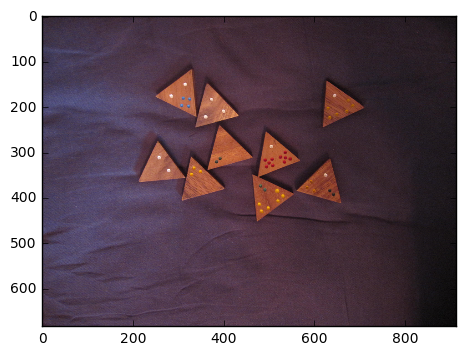

In [169]:
plt.imshow(im)

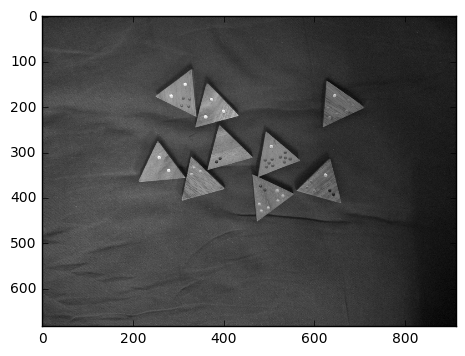

In [170]:
im_gray = (127. * im[:,:,0] + 71. * im[:, :, 1] + 35. * im[:, :, 2]) / 255
#im_gray = skimage.exposure.equalize_hist(im_gray)
plt.imshow(im_gray, cmap = 'gray')

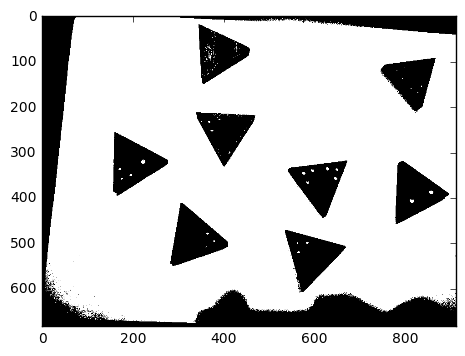

In [74]:
def threshold(i_):
    thr = skimage.filters.threshold_otsu(i_)
    return(i_ > thr)
im_thr = threshold(im_gray)
plt.imshow(im_thr, cmap='gray')

In [81]:
def find_edges(im_gray):
    k = np.array([[1,2,0,-2,-1],[4,8,0,-8,-4],[6,12,0,-12,-6],[4,8,0,-8,-4],[1,2,0,-2,-1]])
    r1 = ndimage.convolve(im_gray, k, mode='constant', cval=0.0)
    r2 = ndimage.convolve(im_gray, k.T, mode='constant', cval=0.0)
    r = np.maximum(r1, r2)
    return(r)

r = find_edges(im_gray)
r = skimage.exposure.equalize_hist(r)

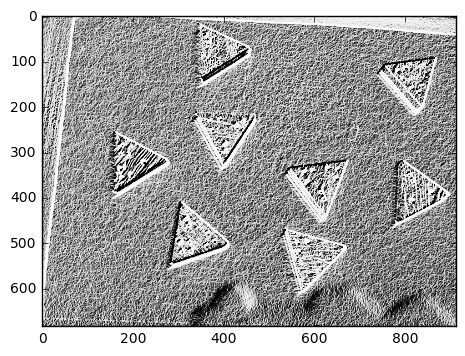

In [82]:
plt.imshow(r, cmap='gray')

In [36]:
from skimage.morphology import watershed
from skimage.filters import sobel
elevation_map = sobel(r)
markers = np.zeros_like(r)
markers[r < 0.96] = 2
markers[r > 0.96] = 1
segmentation = watershed(elevation_map, markers)

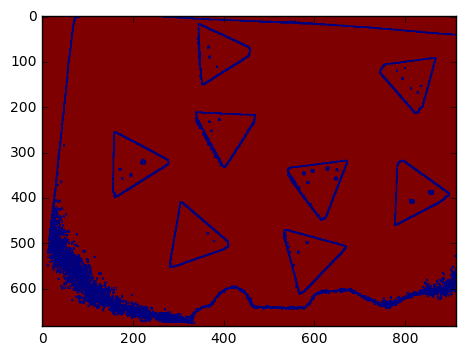

In [37]:
plt.imshow(segmentation)

In [39]:
from scipy import ndimage as ndi
fill_r = ndi.binary_fill_holes(r)

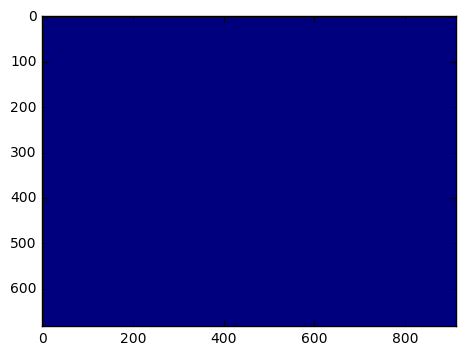

In [40]:
plt.imshow(fill_r)

In [54]:
r = (r > np.mean(r)) * 1

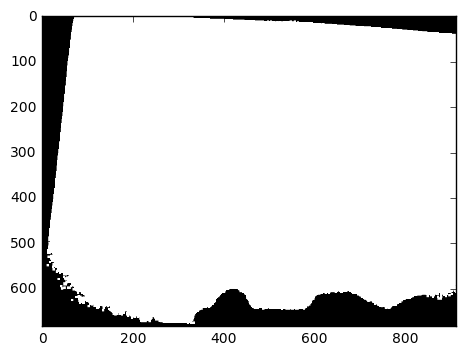

In [68]:
plt.imshow(ndi.binary_fill_holes(r),cmap='gray')

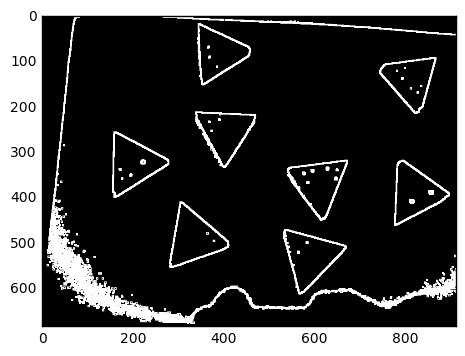

In [69]:
plt.imshow(r,cmap='gray')

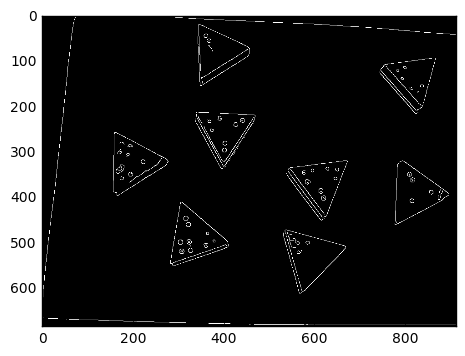

In [87]:
from skimage.feature import canny
from skimage.filters import gaussian
edges = canny(im_gray/255.)
plt.imshow(edges,cmap='gray')

In [86]:
fill_coins = ndi.binary_fill_holes(edges)

TypeError: binary_fill_holes() got an unexpected keyword argument 'cmap'

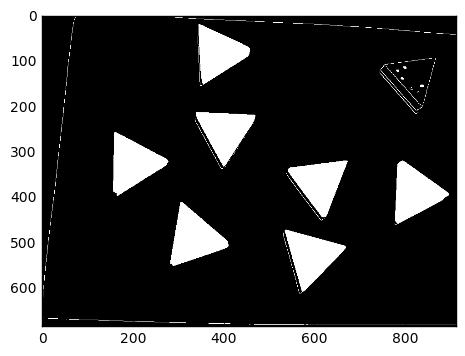

In [89]:
plt.imshow(fill_coins,cmap='gray')

In [91]:
from skimage.filters import sobel

In [100]:
elevation_map = sobel(im_gray)

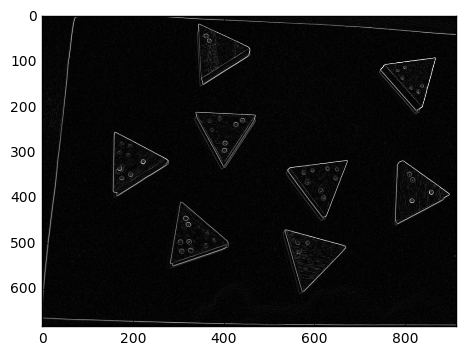

In [141]:
plt.imshow(elevation_map, cmap='gray')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64042ec190>]], dtype=object)

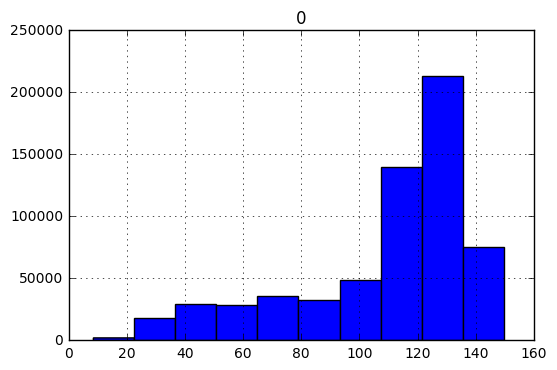

In [121]:
df(im_gray.reshape(-1)).hist()

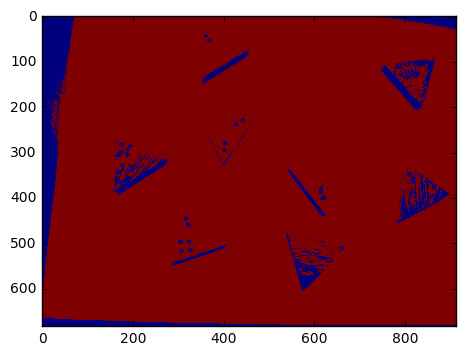

In [152]:
markers = np.zeros_like(im_gray)
markers[im_gray > 50] = 3
#markers[im_gray < 110] = 1
plt.imshow(markers)

In [153]:
segmentation = watershed(elevation_map, markers)

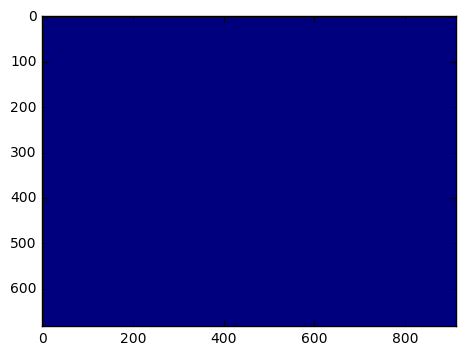

In [154]:
plt.imshow(segmentation)

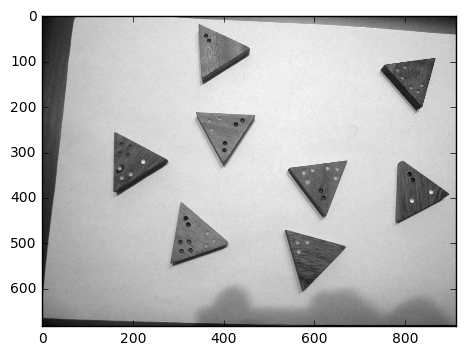

In [140]:
plt.imshow(im_gray, cmap = 'gray')

In [177]:
from skimage.morphology import watershed, disk
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte

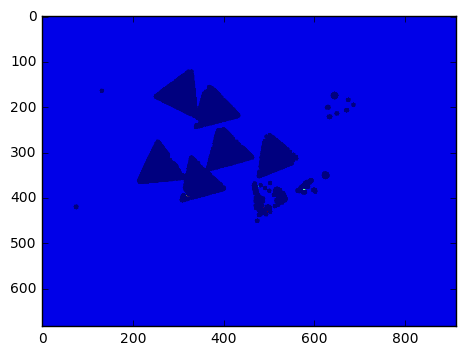

In [178]:
denoised = im_gray
denoised = (denoised - np.min(denoised)) / (np.max(denoised) - np.min(denoised)) * 2 - 1
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]
plt.imshow(markers)

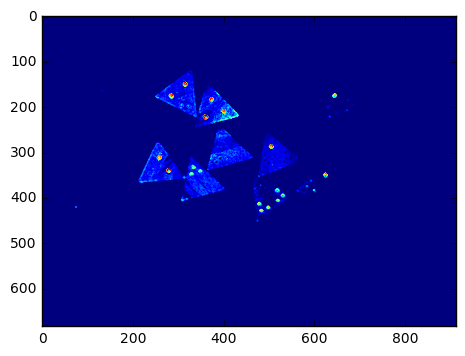

In [179]:
# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))
plt.imshow(gradient)

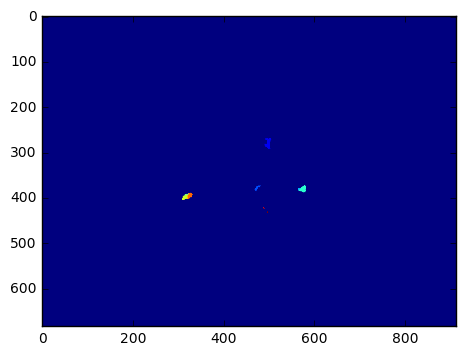

In [180]:
# process the watershed
labels = watershed(gradient, markers)
plt.imshow(labels)